<br>

# Prediction of Wind Turbine Power Production 
***

## Author: Silvio Dunst

<br>

### Project Description
Develop a Python code to accurately predict the power production of a wind turbine based on wind speed values. The wind speed values are in the data set file "powerproduction.txt". Use the linear regression to predict the power output or power production. Explain simple linear regression.
***

<br>

### What is a Regression?
A regression searches for the relationship between variables. One of the most important fields in statistics and machine learning is the regression analysis. Generally, in regression analysis, you usually consider some phenomenon of interest and have a number of observations. Each observation has two or more features. Following the assumption that (at least) one of the features depends on the others, you try to establish a relation among them There are many regression methods available like polynomial, ridge, lasso, elastic and linear regression. The linear regression is a statistical approach for modelling the relationship between a dependent variable with a given set of independent variables. The simple linear regression is an approach for predicting a response using a single feature. The regression try to find a mathematical function/equation what maps the features or variables [1],[2].
***

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.set_option('display.max_rows',None)# show all th erows in the dataframe
df = pd.read_csv("powerproduction.txt")
df


,speed,power
0,0.000,0.000
1,0.125,0.000
2,0.150,0.000
3,0.225,0.000
4,0.275,0.000
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553


#### Plot the CSV file "powerproduction.txt" using a Dataframe

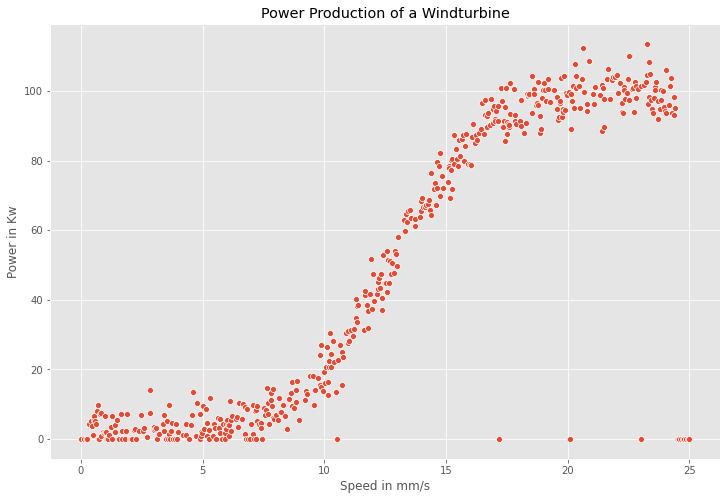

In [5]:
# Plot the CSV file "powerproduction.txt" using a Dataframe
plt.style.use('ggplot') # global parameters for pyplot for "ggplot" plot style
plt.rcParams['figure.figsize'] = 12, 8 # global parameters for pyplot increase the plot size
plt.title("Power Production of a Windturbine")
sns.scatterplot(x='speed',y='power',data=df)
plt.xlabel('Speed in mm/s')
plt.ylabel('Power in Kw');

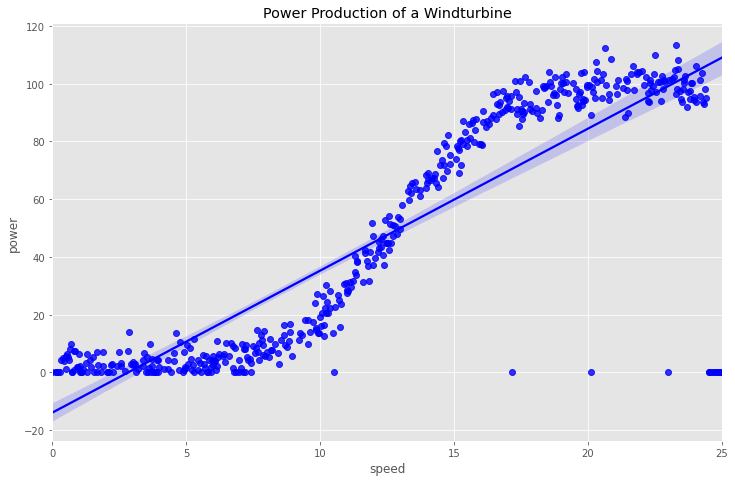

In [3]:

fig = plt.figure(figsize=(12,8))
#title = fig.suptitle("Power Production of a Windturbine", fontsize = 14)
fig.subplots_adjust(top = 0.85, wspace = 0.3)

ax1 = fig.add_subplot(1,1,1)
sns.regplot(x = 'speed',y = 'power',data = df, ax = ax1, color = "b")
plt.title("Power Production of a Windturbine")
plt.show()


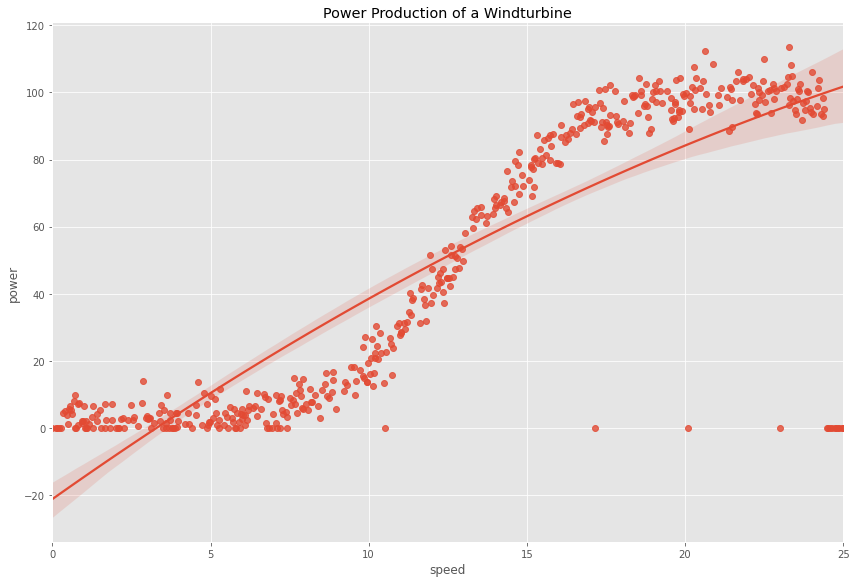

In [4]:
sns.lmplot(x='speed',y='power',data=df, height=8,aspect=1.5, hue=None, order=2,legend_out=True)
#plt.legend("Power Output")
plt.title("Power Production of a Windturbine")
plt.show()

<br>

### Reference
***

[1] : https://realpython.com/linear-regression-in-python/

[2] : https://www.geeksforgeeks.org/linear-regression-python-implementation/?ref=lbp
